# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.


Для анализа даны данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

***ОПИСАНИЕ ДАННЫХ***:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
- `balcony` — число балконов;
- `ceiling_height` — высота потолков (м);
- `cityCenters_nearest` — расстояние до центра города (м);
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
- `first_day_exposition` — дата публикации;
- `floor` — этаж;
- `floors_total` — всего этажей в доме;
- `is_apartment` — апартаменты (булев тип);
- `kitchen_area` — площадь кухни в квадратных метрах (м²);
- `last_price` — цена на момент снятия с публикации;
- `living_area` — жилая площадь в квадратных метрах (м²);
- `locality_name` — название населённого пункта;
- `open_plan` — свободная планировка (булев тип);
- `parks_around3000` — число парков в радиусе 3 км;
- `parks_nearest` — расстояние до ближайшего парка (м);
- `ponds_around3000` — число водоёмов в радиусе 3 км;
- `ponds_nearest` — расстояние до ближайшего водоёма (м);
- `rooms` — число комнат;
- `studio` — квартира-студия (булев тип);
- `total_area` — общая площадь квартиры в квадратных метрах (м²);
- `total_images` — число фотографий квартиры в объявлении

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Откройте файл с данными и изучите общую информацию

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.duplicated().sum()

0

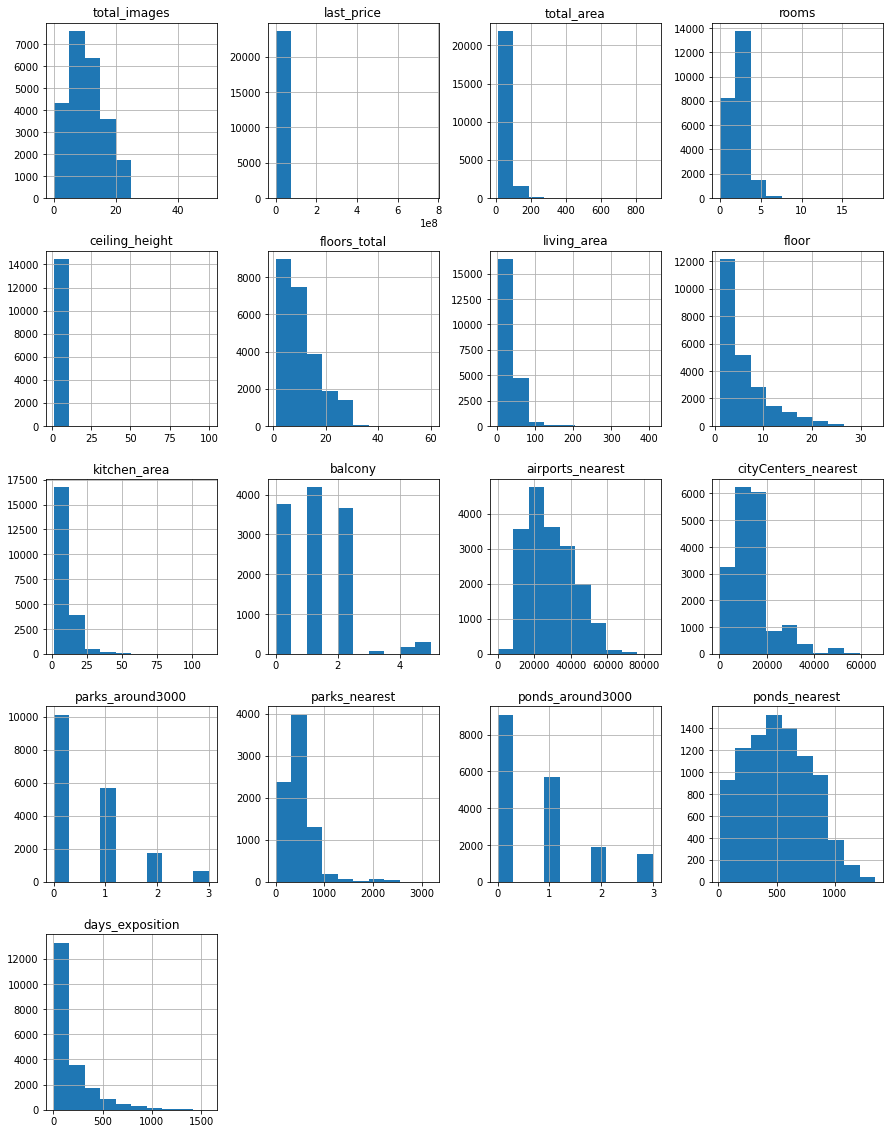

In [5]:
data.hist(figsize = (15, 20))
plt.show()

После ознакомления с данными можно сказать, что в данных присутствуют пропуски, так как всего в наборе 23699 строк. Неполные наборы данных в следующих колонках:
- ceiling_height;
- floors_total;
- living_area;
- is_apartment;
- kitchen_area;
- balcony;
- locality_name;
- airports_nearest;
- cityCenters_nearest;
- parks_around3000;
- parks_nearest;
- ponds_around3000
- ponds_nearest;
- days_exposition.

Помимо неполного набора данных следует привести колонку first_day_exposition к формату date_time.

Дубликатов обнаружено не было.

Из полученных гистрограмм можно подтвердить, что в данных есть пропуски, так как есть аномальные значения. 

### Выполните предобработку данных

In [6]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],
                                             format = '%Y-%m-%dT%H:%M:%S')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace = True)

Переименовали столбец cityCenters_nearest --> city_centers_nearest

In [8]:
data.isna().sum() # сумма пропусков по колонкам

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
#второй вариант
data.isnull().sum()*100/len(data)

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [10]:
data['total_images'].astype('int')

0        20
1         7
2        10
3         0
4         2
         ..
23694     9
23695    14
23696    18
23697    13
23698     4
Name: total_images, Length: 23699, dtype: int64

In [11]:
data['last_price'].astype('int')

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

In [12]:
data['total_area'].round(2)

0        108.00
1         40.40
2         56.00
3        159.00
4        100.00
          ...  
23694    133.81
23695     59.00
23696     56.70
23697     76.75
23698     32.30
Name: total_area, Length: 23699, dtype: float64

In [13]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [14]:
data['locality_name'] = data['locality_name'].str.lower().str.strip()
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок ','при железнодорожной станции ', 'платформа ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'станции ', 'село ', 'пансионат ', 'городского типа ',
             'деревня ', 'городской поселок ', 'городской', 'коттеджный'], '', regex=True)
) 
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', ' янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'бокситогорск'

In [15]:
data['locality_name'].isna().sum() # 49 пропусков

49

In [16]:
data['locality_name'] = data['locality_name'].fillna('unknown') # замена на "неизвестно"
data['locality_name'].isna().sum()

0

In [17]:
data['airports_nearest'].round(2)

0        18863.0
1        12817.0
2        21741.0
3        28098.0
4        31856.0
          ...   
23694    24665.0
23695        NaN
23696        NaN
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 23699, dtype: float64

In [18]:
data['is_apartment'].isna().sum()
data['is_apartment'].mean() # 88% составляют аппартаменты от заполненых анкет. МОжно пропуски заменить на False

0.018018018018018018

In [19]:
data['is_apartment'] = data['is_apartment'].astype(bool)
data['is_apartment'].isna().sum()*100/len(data)

0.0

In [20]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) # заполнение ceiling_height, NaN заменяем на median

In [21]:
# изучим аномально большие значения
data['ceiling_height'].sort_values(ascending = False).head(20) #вероятно, что заполнитель формы неправильно указал запятую при вводе высоты потолка

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
17857     27.0
5246      27.0
20478     27.0
22938     27.0
5807      27.0
21824     27.0
10773     27.0
5669      26.0
18545     25.0
4643      25.0
9379      25.0
11285     25.0
14382     25.0
355       25.0
6246      25.0
Name: ceiling_height, dtype: float64

In [22]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10
data['ceiling_height'].sort_values(ascending = False).head(20)

15061    14.00
22309    10.30
22869    10.00
5863      8.30
17442     8.00
15743     8.00
3474      8.00
20264     6.00
21227     5.80
1388      5.60
7578      5.50
1026      5.30
12628     5.30
464       5.20
1053      5.00
21923     4.90
2802      4.80
19142     4.70
1300      4.70
12401     4.65
Name: ceiling_height, dtype: float64

In [23]:
data['city_centers_nearest'].round(2) # Незаполненные пропуски скорее всего, указывают,что объект продажи находится не в городе.
# Оставим значения неизменным.

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: city_centers_nearest, Length: 23699, dtype: float64

In [24]:
data['parks_nearest'].round(2) # Незаполненные пропуски скорее всего, указывают,что объект продажи находится далеко от парка.
# Оставим значения неизменным.

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23699, dtype: float64

In [25]:
data['ponds_nearest'].round(2) # Незаполненные пропуски скорее всего, указывают,что объект продажи находится далеко от водоема.
# Оставим значения неизменным.

0        755.0
1          NaN
2        574.0
3        234.0
4         48.0
         ...  
23694    381.0
23695      NaN
23696      NaN
23697    196.0
23698      NaN
Name: ponds_nearest, Length: 23699, dtype: float64

In [26]:
# Замена пропусков median значением
def floors_total(row):
    if pd.notnull(row['floors_total']):
        return row['floors_total']
    else:
        # Вычисляем медиану floors_total для заданного этажа
        median_floors = data[data['floor'] == row['floor']]['floors_total'].median()
        
        # Если медиана не найдена, используем значение floor
        if pd.isnull(median_floors):
            return row['floor']
        else:
            # Убеждаемся, что floors_total не меньше floor
            return max(row['floor'], median_floors)
        
data['floors_total'] = data.apply(floors_total, axis=1)
data['floors_total'] = data['floors_total'].astype(int)
# Найдем строки, где floor > floors_total
invalid_cases = data[data['floor'] > data['floors_total']]
invalid_cases

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


В данных больше нет случаев, где этаж квартиры (floor) превышает общее количество этажей в доме (floors_total).

In [27]:
# Зависимость кухонной зоны от других значений
print(data.corr().sort_values(by='kitchen_area', ascending=False)['kitchen_area'].head())
# Зависимоти нет, можно заменить на 0

kitchen_area      1.000000
total_area        0.609121
last_price        0.519869
living_area       0.428674
ceiling_height    0.299071
Name: kitchen_area, dtype: float64


In [28]:
# Отношение kitchen_area к total_area
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']

# Медианное отношение
median_kitchen_ratio = data['kitchen_ratio'].median()

# Индексы с пропусками в kitchen_area
missing_kitchen_area = data['kitchen_area'].isnull()

# Заполняем пропуски
data.loc[missing_kitchen_area, 'kitchen_area'] = data.loc[missing_kitchen_area, 'total_area'] * median_kitchen_ratio

# Удаляю столбец с отношение kitchen_area к total_area
data.drop('kitchen_ratio', axis=1, inplace=True)

In [29]:
# Также проверим зависимость зоны балкона от других значений
print(data.corr().sort_values(by='balcony', ascending=False)['balcony'].head())
# Зависимость также не наблюдается, приведем к нулю пропуски

balcony         1.000000
floors_total    0.192026
floor           0.168773
total_images    0.121693
kitchen_area    0.082705
Name: balcony, dtype: float64


In [30]:
# Незаполненные пропуски в parks_around3000 могут значить, что на таком расстоянии нет парков. Можно заменить на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype(int)

In [31]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) # Вероятно, если значение отсутствует, то водоем находится далеко
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

In [32]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Была выполнена предобработка данных и уменьшили количество пропусков в таблице

Основными причинами пропусков могли стать:

1. Человеческий фактор.
2. Несовершенство программной оболочки (не все поля обязательные, нет чекбоксов с выбором, нет проверки данных)
3. Возможны программные сбои
4. Доработка системы во время её работы (ранее введенные данные не откорректированы)

В процессе предобработки данных:

1. Переименовали название столбца `cityCenters_nearest` на `city_centers_nearest`.
2. Заполнили явные пропуски в таблице, округлили значение до значащих величин.
3. Изменили тип данных, в соответствии с данными находяшимися в столбцах.

### Добавьте в таблицу новые столбцы

In [33]:
data['price_meter'] = (data['last_price'] / data['total_area']).round(2) # Добавлен столбец с ценой за 1 квадратного метра
data['price_meter'].unique()

array([120370.37,  82920.79,  92785.71, ...,  44091.71, 149511.4 ,
        41795.67])

In [34]:
data['day_publication'] = data['first_day_exposition'].dt.weekday  # Добавлен столбец с днем публикации от 0 до 6
data['day_publication'].unique()

array([3, 1, 4, 0, 2, 6, 5])

In [35]:
data['month_publication'] = data['first_day_exposition'].dt.month # Добавлен столбец с месяцем публикации от 1 до 12
data['month_publication'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

In [36]:
data['year_publication'] = data['first_day_exposition'].dt.year # Добавлен столбец с годом публикации
data['year_publication'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

In [37]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
# Добавлен столбец type_apartment_floor тип этажа квартиры (значения — «первый», «последний», «другой»)
data['type_apartment_floor'] = data.apply(floor, axis=1) 
data['type_apartment_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [38]:
data['distance_city_center'] = (data['city_centers_nearest'] / 1000).round(0) # Добавлен столбец distance_city_center расстояние до центра города в километрах
data['distance_city_center'].unique()                                         # (переведены из м в км и округлено значение до ближайших целых значений)

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

### Проведите исследовательский анализ данных

#### Общая площадь

In [39]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

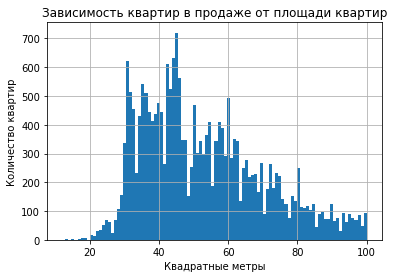

In [40]:
#Оставим значения от минимального 12 до 100 кв. метров построим гистограмму
data.hist('total_area', bins=100, range=(12,100))
plt.title('Зависимость квартир в продаже от площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

***Вывод:***

На рынке самое большое предложение квартир с общей площадью от 40 до 69 кв. метров с максимумом около 52 кв. метров.

#### Жилая площадь

In [41]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

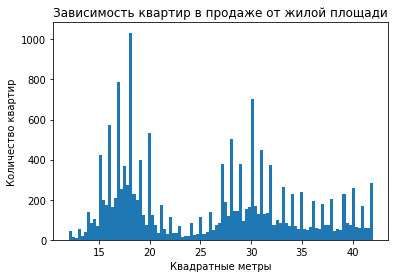

In [42]:
plt.hist(data['living_area'], bins=100, range=(12,42))
plt.title('Зависимость квартир в продаже от жилой площади')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

***Вывод:***

Больше всего продают квартир с жилой площадью около 18 кв. м и 30 кв. метров при этом прослеживается спад предложений в средней зоне 23 кв. метра.

#### Площадь кухни

In [43]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.491431
std          6.029020
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

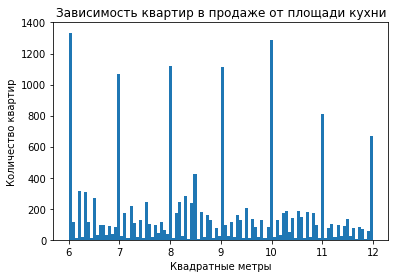

In [44]:
plt.hist(data['kitchen_area'], bins=100, range=(6,12))
plt.title('Зависимость квартир в продаже от площади кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

***Вывод:***

Прослеживается тенденция что больше всего предложений с площадью кухни в 6 метров затем 10 и чередом 7,8,9 кв. метров, при этом в анкетах заметны явные всплески на целых числах.

#### Цена объекта

In [45]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

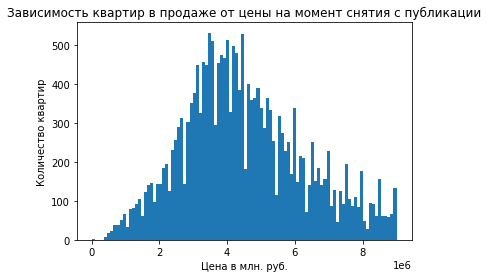

In [46]:
plt.hist(data['last_price'], bins=100, range=(1.219000e+04,9.00000e+06))
plt.title('Зависимость квартир в продаже от цены на момент снятия с публикации')
plt.xlabel('Цена в млн. руб.')
plt.ylabel('Количество квартир')
plt.show()

***Вывод:***

Из гисторгаммы следует, что наиболее часто цена объекта составляет 3,8 - 4,2 миллниона.

#### Количество комнат

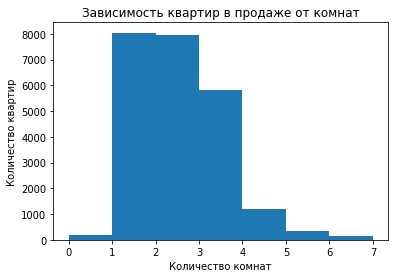

In [47]:
plt.hist(data['rooms'], bins=7, range=(0,7))
plt.title('Зависимость квартир в продаже от комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

***Вывод:***

Среди предложений больше всего однокомнатных квартир. С увеличением комнат количество предложений снижается почти линейно.

#### Высота потолков

In [48]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.698721
std          0.253208
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

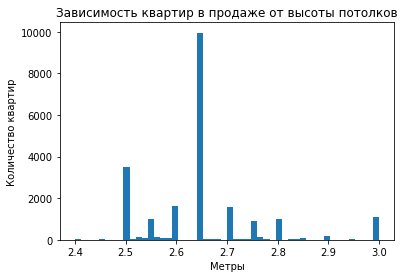

In [49]:
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=50, range=(2.4,3))
plt.title('Зависимость квартир в продаже от высоты потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

***Вывод:***

Среди большинства предложений высота составляет 2.65 метров, далее 2.5, 2.6, 2.7, 2.55 метров.

#### Тип этажа квартиры («первый», «последний», «другой»)

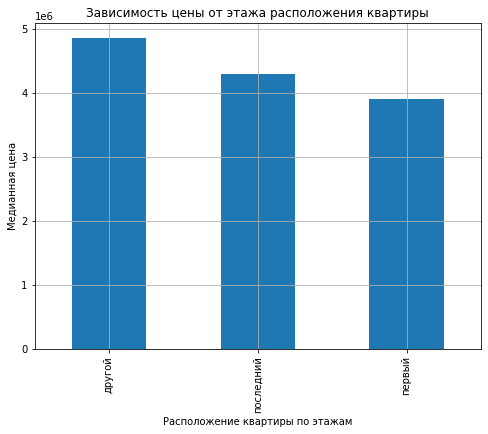

In [50]:
(
    data.pivot_table(index='type_apartment_floor', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False)
    .plot(kind='bar', grid=True, figsize=(8, 6), legend=False, title='Зависимость цены от этажа расположения квартиры'
)
)
plt.xlabel('Расположение квартиры по этажам')
plt.ylabel('Медианная цена')
plt.show()

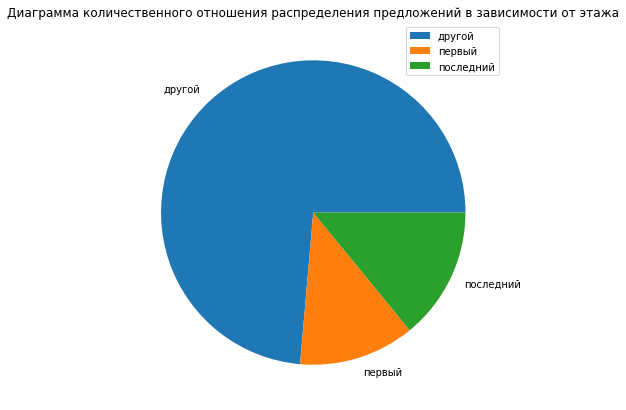

In [51]:
data.pivot_table(index='type_apartment_floor',values='last_price',aggfunc='count') \
  .plot.pie(y='last_price', figsize=(10,7), label='', title='Диаграмма количественного отношения распределения предложений в зависимости от этажа')

plt.show()

***Вывод:***

Менее ценными считаются квартиры на "Первом" и "Последнем" этаже. На круговой диаграмме заметно, что общее количество предложений "Первого" и "Последнего" этажа составляет чуть больше 25% от общего количества предложений, значит люди хотят сьехать с этих этажей.

#### Общее количество этажей в доме

In [52]:
data['floors_total'].describe()

count    23699.000000
mean        10.681759
std          6.599383
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

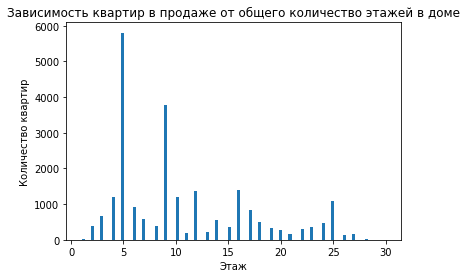

In [53]:
plt.hist(data['floors_total'], bins=100, range=(1,30))
plt.title('Зависимость квартир в продаже от общего количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

***Вывод:***

Больше всего предложений о продаже квартир в пятиэтажных домах, а потом в девятиэтажках.

#### Расстояние до центра города в метрах

In [54]:
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

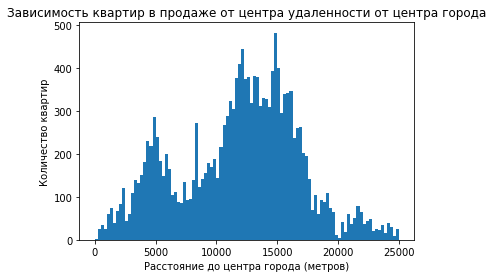

In [55]:
plt.hist(data['city_centers_nearest'], bins=100, range=(0,25000))
plt.title('Зависимость квартир в продаже от центра удаленности от центра города')
plt.xlabel('Расстояние до центра города (метров)')
plt.ylabel('Количество квартир')
plt.show()

***Вывод:***

Больше всего предложений о продаже в спальных районах на окраинах города (на расстоянии 12000 -15000 метров)), и значительным всплеском на расстоянии в 5000 метров от центра города.

#### Расстояние до ближайшего парка

In [56]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

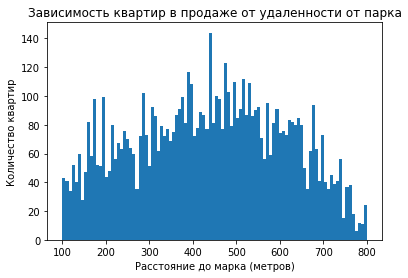

In [57]:
plt.hist(data['parks_nearest'], bins=100, range=(100,800))
plt.title('Зависимость квартир в продаже от удаленности от парка')
plt.xlabel('Расстояние до марка (метров)')
plt.ylabel('Количество квартир')
plt.show()

***Вывод:***

Количество предложений не сильно зависит от удаленности от ближайшего парка. Среднее расстояние до парка премерно составляет 200 - 700 метров.

# Как быстро продавались квартиры (столбец `days_exposition`)

In [58]:
print(data['days_exposition'].describe())

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


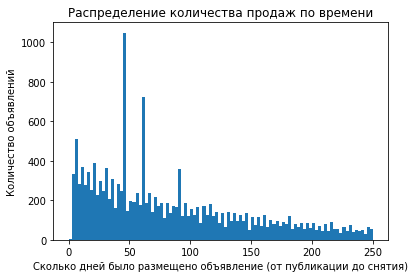

In [59]:
plt.hist(data['days_exposition'], bins=100, range=(0,250))
plt.title('Распределение количества продаж по времени')
plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()

***Анализ времени продажи квартир***

Среднее время продажи составляет примерно 180 дней. Однако более точным показателем является медианное значение, которое составляет 95 дней и не зависит от выбросов и аномальных значений.

В среднем, продажа квартиры занимает 2–3 месяца, в зависимости от таких факторов, как площадь, цена и удалённость от центра города.

К быстрым продажам можно отнести сделки, заключённые в течение 45 дней (в первом квартиле), а к длительным — после 232 дней и более (после третьего квартиля), когда продажа может так и не состояться.

In [60]:
print(data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 
                'day_publication', 'month_publication', 'year_publication']].corr())

                   last_price  total_area  living_area  kitchen_area  \
last_price           1.000000    0.653675     0.566492      0.513476   
total_area           0.653675    1.000000     0.939537      0.659934   
living_area          0.566492    0.939537     1.000000      0.453623   
kitchen_area         0.513476    0.659934     0.453623      1.000000   
rooms                0.363343    0.758344     0.845977      0.326198   
day_publication      0.001550   -0.004695    -0.005605     -0.005570   
month_publication    0.002779    0.004920    -0.002483      0.003495   
year_publication    -0.043089   -0.079912    -0.072696     -0.059935   

                      rooms  day_publication  month_publication  \
last_price         0.363343         0.001550           0.002779   
total_area         0.758344        -0.004695           0.004920   
living_area        0.845977        -0.005605          -0.002483   
kitchen_area       0.326198        -0.005570           0.003495   
rooms           

#### Выявим ключевые факторы, оказывающие наибольшее воздействие на итоговую стоимость объекта.

Проанализируем взаимосвязь между ценой `last_price` и числовыми показателями, используя метод корреляционного анализа.

- `total_area` - общая площадь
- `living_area` - жилая площадь
- `kitchen_area` - площадь кухни
- `rooms` - количество комнат
- `day_publication` - день публикации
- `month_publication` - месяц публикации
- `year_publication` - год публикации

In [61]:
print(data[['last_price','total_area','living_area','kitchen_area',
            'rooms','day_publication','month_publication','year_publication']].corr())

                   last_price  total_area  living_area  kitchen_area  \
last_price           1.000000    0.653675     0.566492      0.513476   
total_area           0.653675    1.000000     0.939537      0.659934   
living_area          0.566492    0.939537     1.000000      0.453623   
kitchen_area         0.513476    0.659934     0.453623      1.000000   
rooms                0.363343    0.758344     0.845977      0.326198   
day_publication      0.001550   -0.004695    -0.005605     -0.005570   
month_publication    0.002779    0.004920    -0.002483      0.003495   
year_publication    -0.043089   -0.079912    -0.072696     -0.059935   

                      rooms  day_publication  month_publication  \
last_price         0.363343         0.001550           0.002779   
total_area         0.758344        -0.004695           0.004920   
living_area        0.845977        -0.005605          -0.002483   
kitchen_area       0.326198        -0.005570           0.003495   
rooms           

In [62]:
print(data[['last_price','total_area','living_area','kitchen_area','rooms']].corr())

              last_price  total_area  living_area  kitchen_area     rooms
last_price      1.000000    0.653675     0.566492      0.513476  0.363343
total_area      0.653675    1.000000     0.939537      0.659934  0.758344
living_area     0.566492    0.939537     1.000000      0.453623  0.845977
kitchen_area    0.513476    0.659934     0.453623      1.000000  0.326198
rooms           0.363343    0.758344     0.845977      0.326198  1.000000


Анализ данных показывает, что между ними отсутствует прямая взаимосвязь. Вероятно, это обусловлено присутствием множества необычных и аномальных значений.

In [63]:
# Функция для расчёта границ выбросов
def calculate_iqr_bounds(data, column, iqr_factor=1.5):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_factor * iqr
    upper_bound = q3 + iqr_factor * iqr
    return lower_bound, upper_bound

list_features = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height']# Список столбцов с выбросами
data_cleaned = data.copy()

overall_mask = pd.Series(True, index=data.index)

total_removed_percentage = 0

initial_iqr_factor = 1.5 # НАч фактор IQR
max_iqr_factor = 2.5 # Макс фактор 

for col in list_features:
    
    iqr_factor = initial_iqr_factor # Устанавливаем начальный фактор IQR
    
    while True:
        lower_bound, upper_bound = calculate_iqr_bounds(data_cleaned, col, iqr_factor=iqr_factor)# Рассчитываем границы выбросов
        
        mask = (data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)
        removed_percentage = (1 - mask.mean()) * 100
        
        new_overall_mask = overall_mask & mask
        new_total_removed_percentage = (1 - new_overall_mask.mean()) * 100

        if new_total_removed_percentage <= 10 or iqr_factor >= max_iqr_factor:
            overall_mask = new_overall_mask
            total_removed_percentage = new_total_removed_percentage
            print(f"Столбец '{col}': удалено {removed_percentage:.2f}% данных при IQR факторе {iqr_factor}")
            break
        else:
            iqr_factor += 0.1 # Увеличиваем фактор IQR на шаг 0.1
            
        if iqr_factor > max_iqr_factor: # Если макс фактор, то выходим
            print(f"Столбец '{col}': после смягчения удалено {removed_percentage:.2f}% данных при максимальном IQR {iqr_factor}")
            break
    
    
    if total_removed_percentage > 10: # Проверка на общ процент удаленных данных, если превышает - выходим
        print(f"Процесс удаления остановлен. Общий процент удалённых данных превышает 10% после обработки столбца '{col}'.")
        break

data_cleaned = data_cleaned[overall_mask]
print(f"Общий процент удалённых данных: {total_removed_percentage:.2f}%")

Столбец 'last_price': удалено 8.58% данных при IQR факторе 1.5
Столбец 'total_area': удалено 5.23% данных при IQR факторе 1.5
Столбец 'living_area': после смягчения удалено 9.60% данных при максимальном IQR 2.500000000000001
Столбец 'kitchen_area': после смягчения удалено 3.03% данных при максимальном IQR 2.500000000000001
Столбец 'rooms': удалено 0.38% данных при IQR факторе 1.5
Столбец 'ceiling_height': после смягчения удалено 11.41% данных при максимальном IQR 2.500000000000001
Общий процент удалённых данных: 9.35%


In [64]:
print(data[['last_price','total_area','living_area','kitchen_area','rooms']].corr())

              last_price  total_area  living_area  kitchen_area     rooms
last_price      1.000000    0.653675     0.566492      0.513476  0.363343
total_area      0.653675    1.000000     0.939537      0.659934  0.758344
living_area     0.566492    0.939537     1.000000      0.453623  0.845977
kitchen_area    0.513476    0.659934     0.453623      1.000000  0.326198
rooms           0.363343    0.758344     0.845977      0.326198  1.000000


***Предварительный анализ***

После удаления выбросов из данных датафрейма, результаты стали более надёжными и точными. Наблюдается почти линейная корреляция между:
- стоимостью и общей площадью;

- тоимостью и количеством комнат.

Корреляция между:

- стоимостью и датой публикации;

- стоимостью и площадью кухни — слабая.

Для остальных показателей корреляция отсутствует. Прямой зависимости нет

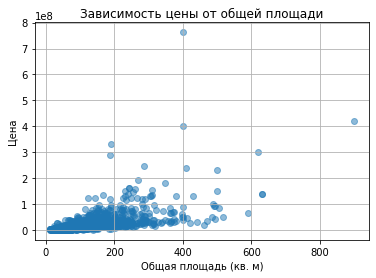

In [65]:
plt.figure(figsize=(6, 4))
plt.scatter(data['total_area'], data['last_price'], alpha=0.5)
plt.grid(True)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь (кв. м)')
plt.ylabel('Цена')
plt.show()

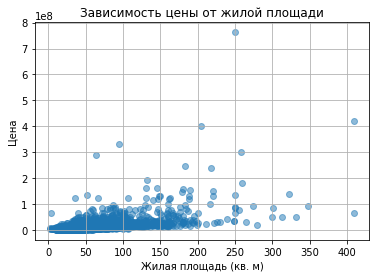

In [66]:
# Зависимость цены от жилой площади
plt.figure(figsize=(6, 4))
plt.scatter(data['living_area'], data['last_price'], alpha=0.5)
plt.grid(True)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь (кв. м)')
plt.ylabel('Цена')
plt.show()

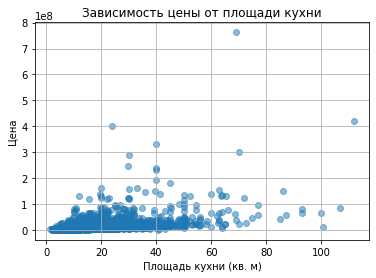

In [67]:
# Зависимость цены от площади кухни
plt.figure(figsize=(6, 4))
plt.scatter(data['kitchen_area'], data['last_price'], alpha=0.5)
plt.grid(True)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни (кв. м)')
plt.ylabel('Цена')
plt.show()

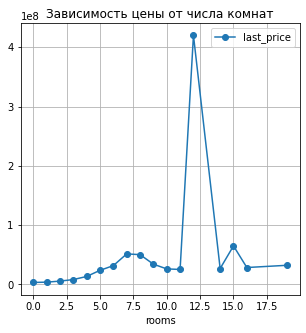

In [68]:
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от числа комнат')
plt.show()

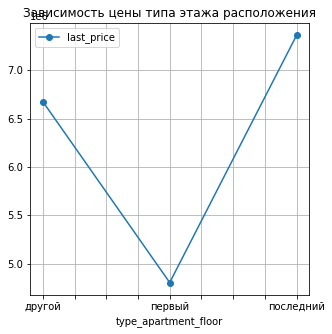

In [69]:
(
    data.pivot_table(index='type_apartment_floor', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены типа этажа расположения')
plt.show()

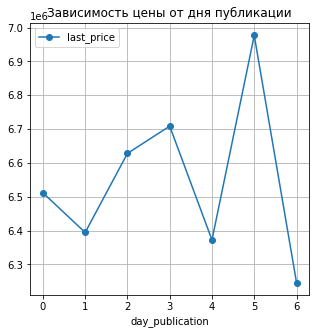

In [70]:
(
    data.pivot_table(index='day_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от дня публикации')
plt.show()

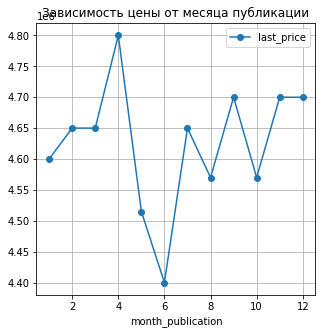

In [71]:
(
    data.pivot_table(index='month_publication', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от месяца публикации')
plt.show()

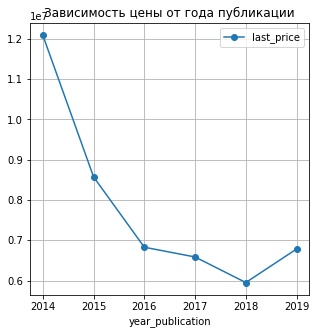

In [72]:
(
    data.pivot_table(index='year_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от года публикации')
plt.show()

***Вывод:***

Результаты исследования подтвердили предварительные выводы:

— Чем больше площадь квартиры, тем выше её стоимость. Между этими параметрами наблюдается сильная корреляция.

— Количество комнат также влияет на цену квартиры: чем больше комнат, тем больше жилая площадь и, как следствие, выше цена. Однако эта зависимость менее выражена, чем зависимость от общей площади, поскольку существуют квартиры с большими комнатами и квартиры в центре города с малым количеством комнат, которые при этом стоят дорого.

— Расположение квартиры на этаже также влияет на её стоимость: квартиры на первом этаже, как правило, стоят дешевле, чем квартиры на других этажах. Квартиры на последнем этаже стоят чуть дороже, чем квартиры на других этажах. Квартиры, расположенные не на первом и не на последнем этаже, имеют самую высокую стоимость.

#### Рассчитаем среднюю стоимость квадратного метра в 10 городах с наибольшим количеством объявлений.

In [73]:
price_sm_name = data.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
price_sm_name.columns = ['count']
price_sm_name = price_sm_name.sort_values(by='count', ascending=False).head(10)
price_sm_name['price_meter'] = data.pivot_table(index='locality_name', values='price_meter').round(2)
price_sm_name.sort_values(by='price_meter', ascending=False)

,count,price_meter
locality_name,,
санкт-петербург,15721,114849.01
пушкин,369,103125.82
кудрово,472,95324.93
парголово,327,90175.91
мурино,590,86087.51
шушары,440,78677.36
колпино,338,75424.58
гатчина,307,68746.15
всеволожск,398,68654.47


<Figure size 864x432 with 0 Axes>

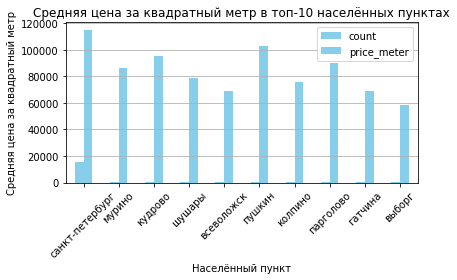

In [74]:
plt.figure(figsize=(12, 6))
price_sm_name.plot(kind='bar', color='skyblue')
plt.title('Средняя цена за квадратный метр в топ-10 населённых пунктах')
plt.xlabel('Населённый пункт')
plt.ylabel('Средняя цена за квадратный метр')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

***Вывод:***

Как и ожидалось, самая высокая средняя стоимость квадратного метра жилья наблюдается в Санкт-Петербурге. Далее следует Пушкин, что, возможно, связано с его развитой инфраструктурой и обилием зелёных зон. Затем идут районы, которые фактически являются частью Санкт-Петербурга и примыкают к нему. Наименьшая стоимость жилья зафиксирована в Гатчине и Всеволожске, до которых достаточно далеко добираться из Санкт-Петербурга, а также в Выборге, который находится на значительном расстоянии от города и имеет небольшую численность населения.

#### Проанализируем рынок недвижимости в Санкт-Петербурге, используя столбец locality_name, и определим среднюю стоимость квартир в зависимости от их удалённости от центра города.

In [75]:
data.query('locality_name == "санкт-петербург"')['distance_city_center'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: distance_city_center, dtype: float64

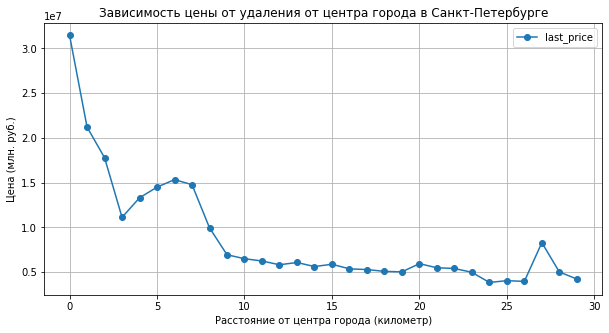

В таблице представлена информация о средней стоимости квартир в зависимости от удалённости от центра Санкт-Петербурга.


,last_price
distance_city_center,
0.0,3.144912e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.112658e+07
4.0,1.330428e+07
5.0,1.449912e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.957717e+06


In [76]:
(
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_city_center', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('Расстояние от центра города (километр)')
plt.ylabel('Цена (млн. руб.)')
plt.show()
print('В таблице представлена информация о средней стоимости квартир в зависимости от удалённости от центра Санкт-Петербурга.')
data.query('locality_name == "санкт-петербург" and distance_city_center<10').pivot_table(values='last_price', index='distance_city_center')

***Вывод:***

В центре Санкт-Петербурга находятся наиболее дорогие квартиры, с максимальными ценами на расстоянии до 1 км от центра, что соответствует элитной недвижимости с ценой около 30 млн рублей.

Начиная с расстояния в 3 км, цена на квартиры начинает снижаться достаточно резко, достигнув средней стоимости в районе 11-15 млн рублей на расстоянии до 5 км. Затем наблюдается постепенное снижение стоимости до отметки около 7 млн рублей на расстоянии 9-10 км от центра.

После этого, начиная с расстояния около 10 км и далее, цены остаются относительно стабильными на уровне 5-10 млн рублей. Однако наблюдается один всплеск цен около 25 км, который может быть связан с отдельными элитными районами или загородной недвижимостью.

Таким образом, наибольшее снижение цен наблюдается на расстоянии до 7-10 км от центра, после чего стоимость квартир стабилизируется, с редкими исключениями.

### Напишите общий вывод

***Общий вывод***

В процессе анализа объявлений о продаже квартир были выполнены следующие шаги и сделаны выводы:

1. Изучена общуая информация о данных.

В данных было обнаружено 23699 записей. Для ряда столбцов были выявлены пропущенные значения и некорректный тип данных. По гистограммам видно, что в данных есть аномальные значения. Явных дубликатов не обнаружено. Данные были признаны полными и достаточными для исследования.

2. Была выполнена предварительная обработка данных.

 - Мы переименовали название столбца `cityCenters_nearest` в `city_centers_nearest`.

 - Мы заполнили явные пропуски в таблице и округлили значения до значащих величин.

 - Мы изменили тип данных в соответствии с данными, находящимися в столбцах.

 - Мы сделали вывод о причинах появления пропусков:

          1.Человеческий фактор.
          2.Несовершенство программной оболочки (не все поля обязательные, нет чекбоксов с выбором, нет проверки данных).
          3.Возможны программные сбои.
          4.Доработка системы во время её работы (ранее введённые данные не были скорректированы).
          
3. В таблицу добавлены новые поля для следующего шага:

 - `price_square_meter` — стоимость квадратного метра с точностью до двух знаков после запятой.

 - `day_publication` — день недели, в который было опубликовано объявление (0 — понедельник, 1 — вторник и т. д.).

 - `month_publication` — месяц публикации.

 - `year_publication` — год публикации.

 - `type_apartment_floor` — тип этажа квартиры (значения — «первый», «последний», «другой»).

 - `distance_city_center` — расстояние до центра города в целых километрах.
 
4. Проведен исследовательский анализ данных.

   1. Были изучены и описаны характеристики среднестатистической квартиры. Это жильё в пятиэтажном доме площадью 52 квадратных метра, с кухней в 6 квадратных метров и потолками высотой 2,65 метра. Скорее всего, это будет однокомнатная или двухкомнатная квартира с небольшими комнатами. Она расположена на расстоянии 13 или 5 километров от центра города.

   2. Было исследовано, как быстро продаются квартиры. Среднее время продажи составляет 180 дней, а медианное значение — 95 дней. Последнее значение более точно отражает среднее время продажи, поскольку оно не зависит от выбросов и необычных значений.

      - В среднем продажа среднестатистической квартиры занимает от двух до трёх месяцев, в зависимости от таких факторов, как площадь, цена и удалённость от центра.

      - Быстрыми продажами можно считать те, которые состоялись за 45 дней (в первом квартиле), а необычно длительные продажи — после 232 дней (после третьего квартиля), когда квартира может вообще не продаться.

   3. Были определены факторы, которые больше всего влияют на общую стоимость объекта. Чем больше общая площадь, тем выше стоимость. Корреляция между этими параметрами очень высокая.

      - Количество комнат также влияет на цену: чем больше комнат, тем больше жилая площадь и тем выше цена. Однако эта зависимость слабее, чем у площади, поскольку бывают квартиры с большими комнатами и квартиры в центре, состоящие из небольшого числа комнат, но стоящие дорого.

      - Первый этаж также влияет на стоимость квартиры: в среднем квартиры на первом этаже значительно дешевле. Чуть дороже квартиры на последнем этаже. Наибольшая стоимость у квартир, расположенных не на первом и не на последнем этаже.

   4. Была рассчитана средняя цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

      - Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, связано с хорошей застройкой и большим количеством парков. Затем идут районы, которые фактически являются Санкт-Петербургом и прилегают к нему. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, которые находятся далеко от Санкт-Петербурга, а также в Выборге, который расположен на большом расстоянии от Санкт-Петербурга и имеет небольшую численность населения.

   5. Была вычислена средняя стоимость квартиры на разном удалении от центра Санкт-Петербурга. Самые дорогие квартиры в центре города, и их стоимость уменьшается с увеличением расстояния от центра города до 7 километров, после чего стоимость перестаёт зависеть от удалённости.
   
      - В центре города квартиры имеют максимальные цены, которые достигают своего пика (около 30 млн руб.) на расстоянии до 1 км от центра.
      - По мере удаления от центра до 7 км цены резко снижаются, достигнув уровня около 10 млн руб.
      - На расстоянии 10 км и более цены стабилизируются на уровне 5-7 млн руб., с редкими исключениями.
      - Был обнаружен всплеск цен на расстоянии около 27 км, что может быть связано с элитной загородной недвижимостью.


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.